# Covid-19 Data Analysis

Date: 02.26.2021

Eric Alexander Zair

Introduction To Data Science

Syracuse University 

Winter 2021


## Overview

The goal of this project is analyze a dataset containing information about covid-19 cases and deaths by US states. The dataset I am using for analysis can be found here: https://data.cdc.gov/api/views/9mfq-cb36/rows.csv. Using this dataset I will be able to take a look at the correlation between covid-19 deaths and covid-19 case for a given state and during a specific time period. The end goal is to see if we can get an idea of what states are doing a “good” job at handling covid-19 as well as cluster the data to figure out what states are similar with respect to covid. We can then determine what states are “good”, “average”, or “bad” with respect to the pandemic. This will be done using K-means clustering. If I have enough time I will also consider looking into time series forecasting on the covid case case count per state and see if I can factor in a dataset containing information on if a vaccine is out during a certain time period.

### Goals

⦁	What state has the most covid cases?

⦁	What state has the most covid deaths?

⦁	What state has the least covid deaths?

⦁	What state has the least covid deaths?

⦁	Is there a pattern between deaths and states that we can find without the need for 3rd party data such as age and pre-existing conditions of victims.

⦁	Construct visualizations (where possible) to display the above metrics.
⦁	Find out the mean and standard deviation of each state with respect to covid-19.

⦁	Compare state population to covid cases.

⦁	Compare state population to covid deaths.

⦁	Create a metric to represent the efficiency of a state with respect to covid-19.

⦁	Run K-Means cluster on the dataset to figure out which states are most similar in regards to covid-19 related metrics.

In [237]:
# Install all required 3rd party packages.
install.packages('usdata')
install.packages('ggplot2')
install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [238]:
# This is the project that we will be running analysis on.
covid19_dataset <- 'https://data.cdc.gov/api/views/9mfq-cb36/rows.csv'

More detailed information about this dataset can be found at https://healthdata.gov/dataset/united-states-covid-19-cases-and-deaths-state-over-time

In [239]:
# Load in the dataset.
df <- read.csv(covid19_dataset)

## Explore the dataset

First let's take a look at the number of rows and columns in our dataset.

In [240]:
df_dims <- dim(df)
cat("There are", df_dims[1], "rows in the dataset.\n")
cat("There are", df_dims[2], "columns in the dataset.\n")

There are 24060 rows in the dataset.
There are 15 columns in the dataset.


Now let's take a look at what columns we are dealing with in this dataset.


In [241]:
list_of_cols_in_df <- colnames(df)
for (i in 1:length(list_of_cols_in_df)) {
    cat("Column", i, "-", list_of_cols_in_df[i], "\n")
}

Column 1 - submission_date 
Column 2 - state 
Column 3 - tot_cases 
Column 4 - conf_cases 
Column 5 - prob_cases 
Column 6 - new_case 
Column 7 - pnew_case 
Column 8 - tot_death 
Column 9 - conf_death 
Column 10 - prob_death 
Column 11 - new_death 
Column 12 - pnew_death 
Column 13 - created_at 
Column 14 - consent_cases 
Column 15 - consent_deaths 


Let's take a better look at the data frame to understand the type of each column and what an individual vector entry (row) looks like.

In [242]:
head(df, 15)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,12/08/2020,OK,205999,171497,34502,0,0,1752,1680,72,0,0,12/09/2020 02:45:40 PM,Agree,Agree
2,08/29/2020,SD,12942,NA,NA,425,0,167,165,2,2,0,08/30/2020 02:49:52 PM,N/A,Agree
3,11/06/2020,SD,52639,NA,NA,1488,73,510,476,34,28,3,11/07/2020 02:45:17 PM,N/A,Agree
4,09/21/2020,MP,69,69,0,0,0,2,2,0,0,0,09/22/2020 01:51:57 PM,Agree,Agree
5,06/28/2020,PA,85988,83529,2459,492,13,6614,NA,NA,8,4,06/29/2020 02:37:31 PM,Agree,Not agree
6,12/02/2020,NY,346492,NA,NA,5775,0,10117,NA,NA,56,0,12/03/2020 03:21:08 PM,Not agree,Not agree
7,01/29/2020,MA,0,NA,NA,0,NA,0,NA,NA,0,NA,03/26/2020 04:22:39 PM,Agree,Agree
8,09/26/2020,PW,0,NA,NA,0,0,0,NA,NA,0,0,09/27/2020 01:39:49 PM,,
9,03/07/2020,GA,11,11,0,3,0,0,NA,NA,0,NA,03/26/2020 12:22:39 PM,Agree,Agree


To better understand the data we will take state from the dataset and get all records that are associated with it.

We will then take a look at the tot_cases associated in decending order.

In [243]:
# Get only results from florida.
df_florida <- df[which(df$state == 'FL'),]

# Sort the florida df by total cases (tot_cases) in decreasing order.
df_florida <- df_florida[order(df_florida$tot_cases, decreasing = TRUE),]

# View the new df we have.
head(df_florida, 20)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
4212,02/25/2021,FL,1857670,NA,NA,6519,1758,30478,NA,NA,138,10,02/26/2021 03:02:41 PM,Not agree,Not agree
24039,02/24/2021,FL,1851151,NA,NA,6923,2605,30340,NA,NA,127,12,02/25/2021 02:54:32 PM,Not agree,Not agree
20642,02/23/2021,FL,1844228,NA,NA,5483,1791,30213,NA,NA,148,9,02/24/2021 02:56:12 PM,Not agree,Not agree
23091,02/22/2021,FL,1838745,NA,NA,4037,884,30065,NA,NA,159,8,02/23/2021 02:51:13 PM,Not agree,Not agree
2988,02/21/2021,FL,1834708,NA,NA,4935,1231,29906,NA,NA,93,4,02/22/2021 02:53:38 PM,Not agree,Not agree
377,02/20/2021,FL,1829773,NA,NA,7129,2382,29813,NA,NA,121,8,02/21/2021 02:57:50 PM,Not agree,Not agree
182,02/19/2021,FL,1822644,NA,NA,6536,1479,29692,NA,NA,218,17,02/20/2021 02:45:37 PM,Not agree,Not agree
391,02/18/2021,FL,1816108,NA,NA,5030,1468,29474,NA,NA,163,12,02/19/2021 03:33:51 PM,Not agree,Not agree
4294,02/17/2021,FL,1811078,NA,NA,7185,2934,29311,NA,NA,157,14,02/18/2021 02:43:57 PM,Not agree,Not agree




So as we can see from the above dataframe, the data is arange in such a way that there is an entry for each state for each day. As in every day an entry for the state is entered. However in order to confirm this I wanted to view the correlation between the `tot_cases` and the `submission_date`

Now that we understand our data and the way that it is formated, we can move to the next step, cleaning up the data

## Data Transformation

Before we begin doing any form of data analysis or constructing any charts, it would be best to transform some of the columns/variables that we have into different "types".



### Convert column types

The submission_date field is currently stored as a char field, but we need to convert that to a time field in order to use ggplot2 and have X axis be submission_date. For any visualizations where we want to show change over time, it will be extremely important.

We will not need the `created_at` field in this dataset, as it does not actually tell us anything about the data. We will remove this entire column.

In [244]:
# First we convert the submission_date field to a date type.
df$submission_date <- as.Date(df$submission_date, "%m/%d/%Y")

# Confir that the submission_date field has been converted to a date type.
head(df)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
,<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>
1,2020-12-08,OK,205999,171497,34502,0,0,1752,1680,72,0,0,12/09/2020 02:45:40 PM,Agree,Agree
2,2020-08-29,SD,12942,NA,NA,425,0,167,165,2,2,0,08/30/2020 02:49:52 PM,N/A,Agree
3,2020-11-06,SD,52639,NA,NA,1488,73,510,476,34,28,3,11/07/2020 02:45:17 PM,N/A,Agree
4,2020-09-21,MP,69,69,0,0,0,2,2,0,0,0,09/22/2020 01:51:57 PM,Agree,Agree
5,2020-06-28,PA,85988,83529,2459,492,13,6614,NA,NA,8,4,06/29/2020 02:37:31 PM,Agree,Not agree
6,2020-12-02,NY,346492,NA,NA,5775,0,10117,NA,NA,56,0,12/03/2020 03:21:08 PM,Not agree,Not agree


In [245]:
# Now we will convert the created_at column to a date type.
df <- df[, !(names(df) %in% c('created_at'))]

# Confirm that created_at columns has been removed from the dataset.
head(df, 1)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths
,<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,2020-12-08,OK,205999,171497,34502,0,0,1752,1680,72,0,0,Agree,Agree


### Convert state abreviations to full names

I also find it nicer and more symplistic to take the `state` column and change it from the abbreviation of the state to the full name. For example NY shoud be changed to "New York" for the sake of ease of eye. It is easier to know what state is what for the average person if we use the full name.

In [246]:
# Import usdata library. This contains a built in function to convert state abbrviations to state names.
library(usdata)

# Convert all state abbreviations to full names.
# We convert the data to upper case, just in case a data entry was submitted in lowercase.
df$state <- abbr2state(toupper(df$state))

# Confirm that state column has been converted correctly.
head(df)

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,consent_cases,consent_deaths
,<date>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,2020-12-08,Oklahoma,205999,171497,34502,0,0,1752,1680,72,0,0,Agree,Agree
2,2020-08-29,South Dakota,12942,NA,NA,425,0,167,165,2,2,0,N/A,Agree
3,2020-11-06,South Dakota,52639,NA,NA,1488,73,510,476,34,28,3,N/A,Agree
4,2020-09-21,NA,69,69,0,0,0,2,2,0,0,0,Agree,Agree
5,2020-06-28,Pennsylvania,85988,83529,2459,492,13,6614,NA,NA,8,4,Agree,Not agree
6,2020-12-02,New York,346492,NA,NA,5775,0,10117,NA,NA,56,0,Not agree,Not agree


## Visualizations Over Time

### Total cases over time

#### Remove NA rows

Before we start visualizing the data we need to make sure that there are no NAs in any of the fields that we need in order to produce plots.

The fields that we must clean are `state`, `tot_cases`, `tot_death`, and  `submission_date`.


#### A view of missing records
Let's take a look at the number of NAs in each column. We can decide if there are any records that need to be removed.

In [247]:
library(dplyr)
colSums(is.na(df))

submission_date           state       tot_cases      conf_cases      prob_cases 
              0            3609               0           13511           13511 
       new_case       pnew_case       tot_death      conf_death      prob_death 
              0            5076               0           13353           13353 
      new_death      pnew_death   consent_cases  consent_deaths 
              0            5174               0               0

So looking at the above we can see that the only field that we currently care about and contains NA fields is `state`.

This is actually a bit of a problem. There is a large number of state names that are missing here.

Unfortunately since there is no way to guess which state is which, we will after to create a dataframe with these NA records removed. This will definately cause us to lose a moderate amount of data.

In [248]:
cat("Total number of records in dataset:", nrow(df))

Total number of records in dataset: 24060

Before we remove the NA records in the dataset let's take a look at the percentage of data that we will be unfortuneately losing.

In [249]:
number_of_records_to_be_removed <- colSums(is.na(df))['state']
total_number_of_records <- nrow(df)
percentage_of_data_lost <- number_of_records_to_be_removed / total_number_of_records

cat('Number of records to be removed:', number_of_records_to_be_removed, '\n')
cat('Number of records remaining after deletion:', total_number_of_records - number_of_records_to_be_removed, '\n\n')

cat('Percentage of records lost from dataset:', percentage_of_data_lost * 100, '\n')
cat('Percentage of records remaining in dataset:', 100 - percentage_of_data_lost * 100, '\n')

Number of records to be removed: 3609 
Number of records remaining after deletion: 20451 

Percentage of records lost from dataset: 15 
Percentage of records remaining in dataset: 85 


Darn, this is a huge amout of data that we are losing, but there isn't any way to fix this problem. The data contained in the `state` field is categorical. There is no way to tell what state should be filled in for any of the missing rows, and thus we have no choice but to remove these records.



In [250]:
# Remove all rows that have state set to NA.
df <- df[!is.na(df$state),]

Let's take a look at the total number of cases over the course of time.

For this example we will look at New York state's overall covid cases.

In [251]:
library(ggplot2)

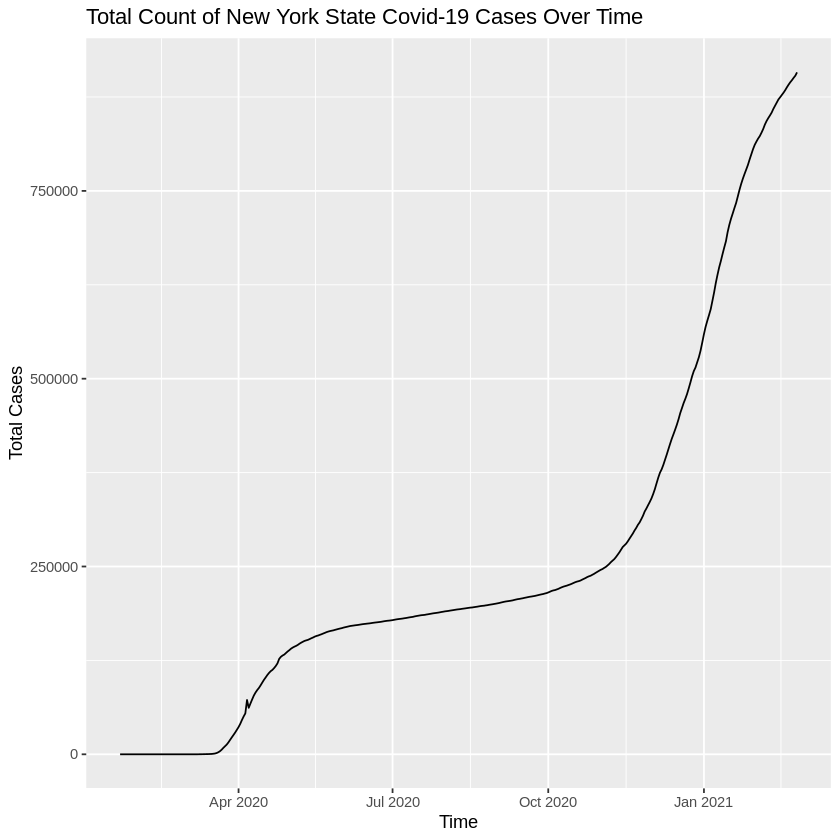

In [272]:
new_york_df <- df[which(df$state == 'New York'),]
ggplot(new_york_df) + geom_line(aes(x = submission_date, y = tot_cases)) +
                      xlab('Time') +
                      ylab('Total Cases') +
                      ggtitle('Total Count of New York State Covid-19 Cases Over Time')

In [253]:
# TODO SHOW A BETTER GRAPH OF THIS.

The above graph shows the spread of cases from the beginning entries in our dataset to the last entry in our dataset.

However, the above graph is not exactly the best view of our data.

Instead of looking at the range between these months, we should take a look at the graph where the X axis (submission dates) contains every month between the time period of April 2020 and Jan 2021.


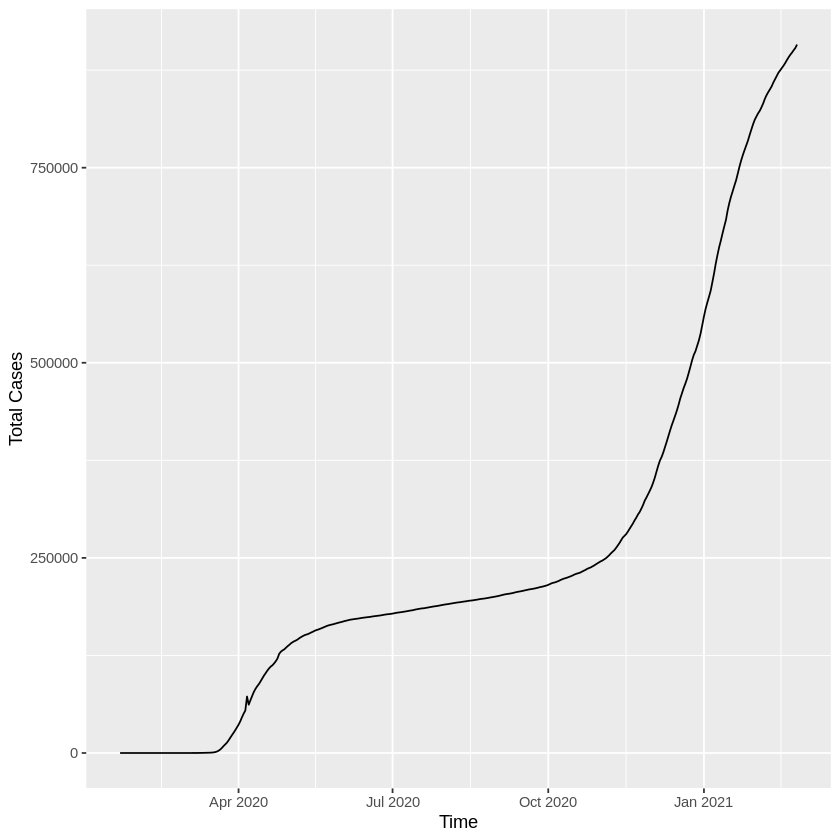

In [273]:
# Update later...
ggplot(new_york_df) + geom_line(aes(x = submission_date, y = tot_cases)) +
                      xlab('Time') +
                      ylab('Total Cases')


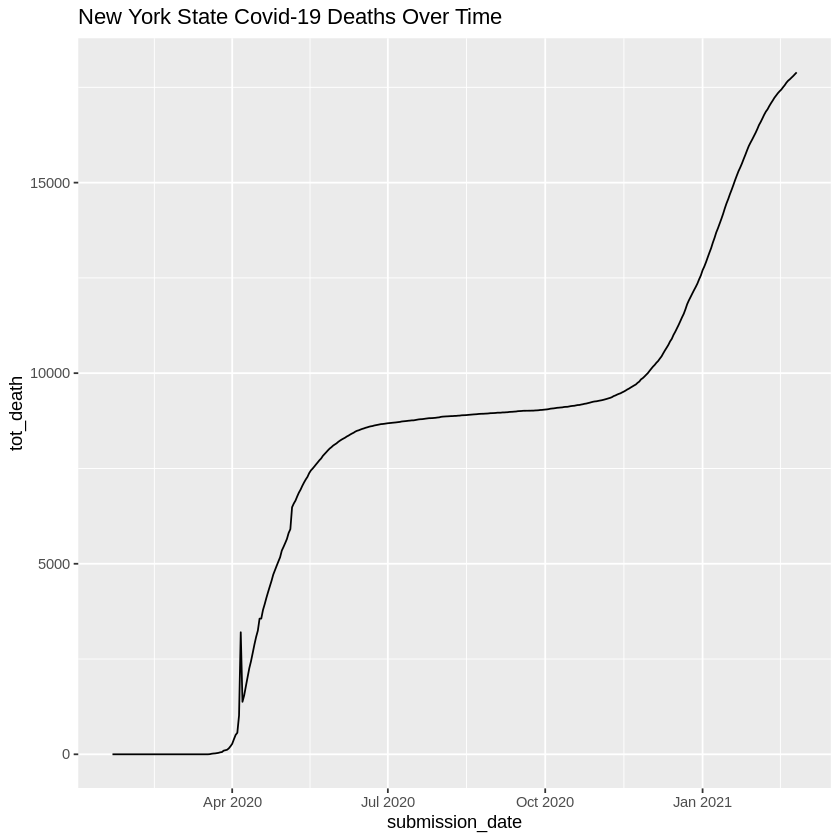

In [274]:
ggplot(new_york_df) + geom_line(aes(x = submission_date, y = tot_death)) +
                      ggtitle('New York State Covid-19 Deaths Over Time')

In [256]:
# TODO BETTER VIEW OF THE ABOVE PLOT

In [257]:
# SHOW ALL STATES WITH DIFFERENT LINE GRAPHS.

### Count of cases per each state

With 50 different states (including the district of columbia), it is really hard to view all of the line graphs at the same time. We could create a different line per each different state, however our data would be extremely hard to read and doing this would be rather pointless.

Instead we will take a look at the count of cases each state has by using a bar plot. This will give us a good idea of which state has the most covid cases. Using this will allow us to view the max amount of cases that each state has in the same plot, allowing us to make comparisons between each distinct state.

We will also add a column for the count of deaths per each state. This will come in handy to view deaths by state using a bar chart as well.

In [258]:
# Construct a new dataframe that contains 2 variables:
# 1. The name of the state
# 2. The max count of covid cases for that state.
df_of_max_covid_cases_by_state <- data.frame(state = character(), max_cases = numeric(0), max_deaths = numeric(0))

# Now we itereate through all of the states that we have in our dataframe and
# append the state and the max count of covid cases for that state into the above
# data frame that we created.
for (state in unique(df$state)) {
    # Get the df for a specific given state.
    state_df <- df[which(df$state == state),]

    # Sort by tot_cases to make sure that we get the largest record in the dataset.
    state_df <- state_df[order(state_df$tot_cases, decreasing = TRUE),]

    # The first record is going to be the largest count of covid cases, as that is how the dataset
    # is setup.
    max_cases_in_state <- head(state_df$tot_cases, 1)
    max_deaths_in_state <- head(state_df$tot_death, 1)

    # Add new record to the new dataframe that we created.
    new_row <- c(state, max_cases_in_state, max_deaths_in_state)
    df_of_max_covid_cases_by_state[nrow(df_of_max_covid_cases_by_state) + 1,] <- new_row
}

# Sort the dataframe by state name so that it reads fluidly.
df_of_max_covid_cases_by_state <- df_of_max_covid_cases_by_state[order(df_of_max_covid_cases_by_state$state),]

In [259]:
# Confirm that the dataframe we generated looks correct.
number_of_rows_in_dataframe <- nrow(df_of_max_covid_cases_by_state)
cat("Number of entries in dataframe:", number_of_rows_in_dataframe, "\n")

# Take a look at very state's max count of covid cases.
head(df_of_max_covid_cases_by_state, 51)

Number of entries in dataframe: 51 


,state,max_cases,max_deaths
,<chr>,<chr>,<chr>
30,Alabama,491110,9831
12,Alaska,55886,287
46,Arizona,812907,15814
7,Arkansas,318122,5397
24,California,3460326,50991
10,Colorado,424677,5925
41,Connecticut,279159,7614
26,Delaware,85801,1406
20,District of Columbia,40122,1005


### Bar charts of total cases by state

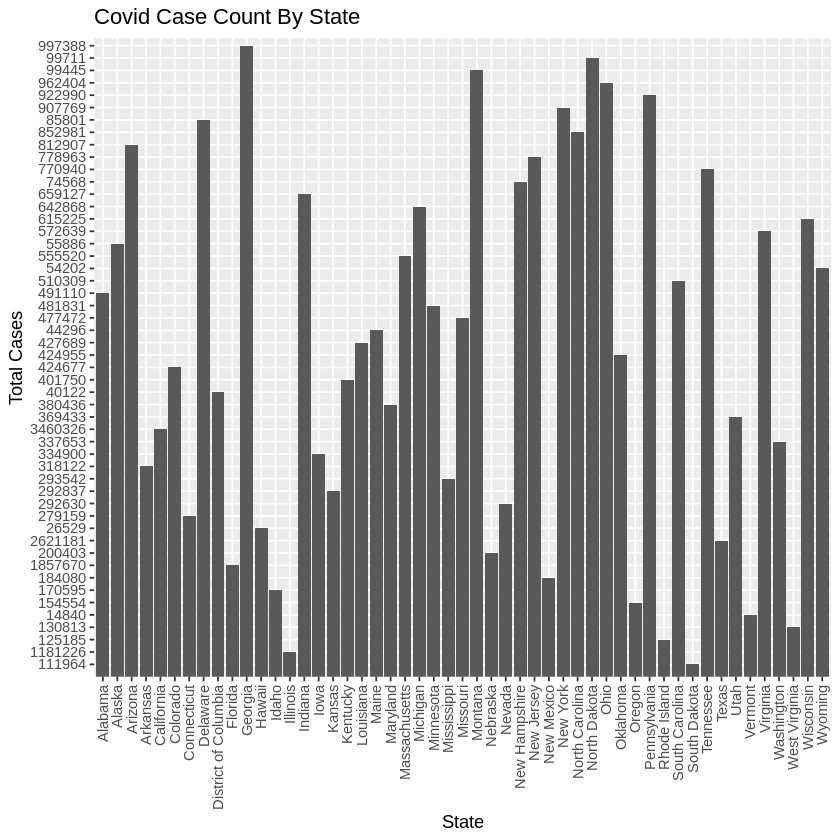

In [269]:
p <- ggplot(data = df_of_max_covid_cases_by_state, aes(x = state, y= max_cases)) +
    geom_bar(stat='identity') +
    xlab('State') +
    ylab('Total Cases') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    ggtitle('Covid Case Count By State')

show(p)

Let's take a look at the data in the data in the form of a scatter plot. I don't expect us to learn anything new from using this plot, however it is always to have multiple different ways to visualize data.

### Dataset metrics

Now it's time to take a look at the averages of our data.

What is the mean of cases?
What is the median of cases?
What is the std of cases?
What is the range of the set of max cases for every state?
What state has the most cases?
What state has the least cases?



In [261]:
# Let's calculate some metrics...
cat("Mean of max cases:", mean(df_of_max_covid_cases_by_state$max_cases), '\n')
cat("Median of max cases:", median(df_of_max_covid_cases_by_state$max_cases), '\n')
cat("Standard deviation of max cases:", sd(df_of_max_covid_cases_by_state$max_cases), "\n\n")

# Let's look at the state with the max number of cases...
max_number_of_cases <- max(df_of_max_covid_cases_by_state$max_cases)
state_with_most_cases <- df_of_max_covid_cases_by_state[
    which(max_number_of_cases == df_of_max_covid_cases_by_state$max_cases),]$state
cat("State with highest count of cases:", state_with_most_cases, "\n")
cat('Highest amount of cases in a state:', max_number_of_cases, "\n\n")

# Let's look at the state with the min number of cases...
min_number_of_cases <- min(df_of_max_covid_cases_by_state$max_cases)
state_with_least_cases <- df_of_max_covid_cases_by_state[
    which(min_number_of_cases == df_of_max_covid_cases_by_state$max_cases),]$state
cat("State with least count of cases:", state_with_least_cases, "\n")
cat('Lowest amount of cases in a state:', min_number_of_cases, "\n\n")

Warning message in mean.default(df_of_max_covid_cases_by_state$max_cases):
“argument is not numeric or logical: returning NA”


Mean of max cases: NA 
Median of max cases: 424955 
Standard deviation of max cases: 630292.8 

State with highest count of cases: Georgia 
Highest amount of cases in a state: 997388 

State with least count of cases: South Dakota 
Lowest amount of cases in a state: 111964 



### Bar charts of total deaths by state

Now let's take a look at the number of deaths per state.

We will the calculate the same metrics as above, but for deaths per state instead of total cases.

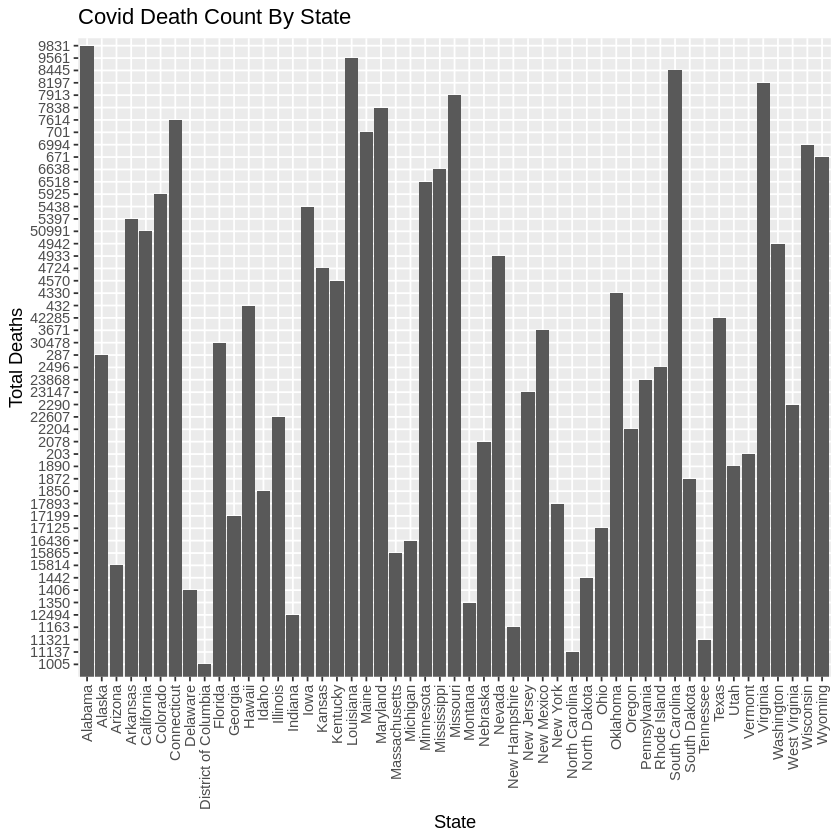

In [270]:
p <- ggplot(data = df_of_max_covid_cases_by_state, aes(x = state, y= max_deaths)) +
    geom_bar(stat='identity') +
    xlab('State') +
    ylab('Total Deaths') +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    ggtitle('Covid Death Count By State')

show(p)

### Dataset Metrics

In [263]:
# Let's calculate some metrics...
cat("Mean of max deaths:", mean(df_of_max_covid_cases_by_state$max_deaths), '\n')
cat("Median of max deaths:", median(df_of_max_covid_cases_by_state$max_deaths), '\n')
cat("Standard deviation of max deaths:", sd(df_of_max_covid_cases_by_state$max_deaths), "\n\n")

# Let's look at the state with the max number of cases...
max_number_of_deaths <- max(df_of_max_covid_cases_by_state$max_deaths)
state_with_most_deaths <- df_of_max_covid_cases_by_state[
    which(max_number_of_deaths == df_of_max_covid_cases_by_state$max_deaths),]$state
cat("State with highest count of deaths:", state_with_most_deaths, "\n")
cat('Highest amount of deaths in a state:', max_number_of_deaths, "\n\n")

# Let's look at the state with the min number of cases...
min_number_of_deaths <- min(df_of_max_covid_cases_by_state$max_deaths)
state_with_least_deaths <- df_of_max_covid_cases_by_state[
    which(min_number_of_deaths == df_of_max_covid_cases_by_state$max_deaths),]$state
cat("State with least count of deaths:", state_with_least_deaths, "\n")
cat('Lowest amount of deaths in a state:', min_number_of_deaths, "\n\n")

Warning message in mean.default(df_of_max_covid_cases_by_state$max_deaths):
“argument is not numeric or logical: returning NA”


Mean of max deaths: NA 
Median of max deaths: 287 
Standard deviation of max deaths: 10481.17 

State with highest count of deaths: Alabama 
Highest amount of deaths in a state: 9831 

State with least count of deaths: District of Columbia 
Lowest amount of deaths in a state: 1005 



###Results

What I find to be extremely interesting is the relationship between count of covid-19 deaths and cases does not appear to be linearly dependent. In otherwords, the count of deaths does not corelate mainly to the count of cases. Most likely external factors determine the number of deaths. For example health issues, age, physical condition, etc...

Furthermore, we saw above that Georgia easily had the most cases of covid, yet Georgia's overall deaths is not nearly that high compared to many of the other states. There were tons of states that had much either death rates and much smaller number of covid cases.

Moreover, Georgia (for the most part) is a non-city-like state. The population should be lower than many other places, yet the number of cases that Georgia had was much higher then even NY state.

### Corelation between deaths and cases

After realizing that more cases does not (in almost all cases) imply that there will be a lot more deaths in the state.

We will generate a scatter plot to look at the correlation between covid deaths and covid cases.

Afterwards we will calculate some metrics with respect to deaths and cases by state.

#### Scatter plot

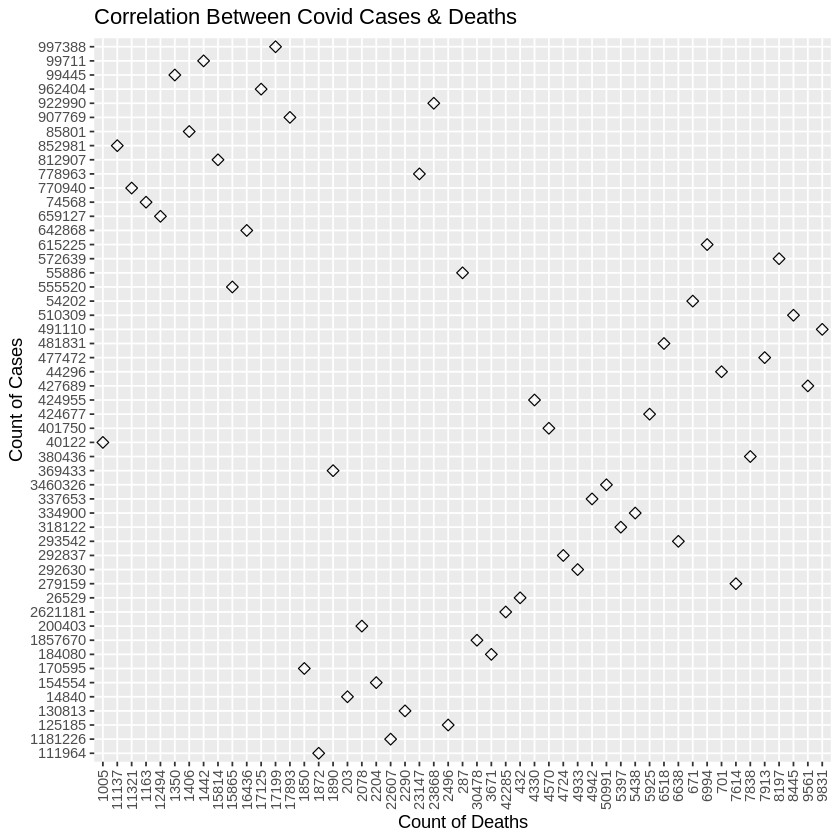

In [271]:
# We need to make a new df and sort these fields so that the data
# is a lot easier to interpret.
# corelation_df <- df_of_max_covid_cases_by_state
# corelation_df$max_cases <- sort(corelation_df$max_cases)
# corelation_df$max_cases <- sort(corelation_df$max_deaths)

# We will make the X-axis deaths and the Y axis cases.
p <- ggplot(df_of_max_covid_cases_by_state, aes(x = max_deaths, y = max_cases)) +
    geom_point(size=2, color="black", shape=5) +
    xlab("Count of Deaths") +
    ylab("Count of Cases") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
    ggtitle('Correlation Between Covid Cases & Deaths')

show(p)

#### Percentage of deaths per cases by state

Let's ignore the form of the graph for now...

To follow up with research into the correlation of these features, we will generate a new column in our data set called `percent_of_deths_by_case` and then plot it. This will effectively tell us what percentage of people who had covid-19 in a given state actually died.

We will then produce a barplot to represent this. This will finalize our research into the corelation between deaths and cases.

## Clustering States

## (FUTURE) Time Series Analysis

The goal here is to see if we can accurately come up with a line based equation for predicting the future trend trend (number of cases) of covid-19 cases and covid-19 deaths.

# We will then take the results we have created and display them over set interval of time e.g. (every month or every 2 weeks).

The goal here is to cluster our data (using the Kmeans machine learning algorithm) and compare the similarties of each state using all the variables in the dataset that we have.

To do this we first need to make a different column for each different state.

Then we need to feed in the data to our clustering algorithm.